In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv("C:/Users/supra/Sales-Forecasting/Sales_Data.csv")

In [196]:
df.head()

,Month,Sales
0,1/1/2006,112
1,2/1/2006,118
2,3/1/2006,132
3,4/1/2006,129
4,5/1/2006,121


In [197]:
df.tail()

,Month,Sales
139,8/1/2017,606
140,9/1/2017,508
141,10/1/2017,461
142,11/1/2017,390
143,12/1/2017,432


In [198]:
import datetime
# Create a new column (Date) to capture date information in date format
df['Date'] = df['Month'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))

# Delete original Date (Month) variable from dataframe
del df['Month']

# Set date as index
df.set_index('Date', inplace=True)

In [199]:
df.head()

,Sales
Date,
2006-01-01,112
2006-02-01,118
2006-03-01,132
2006-04-01,129
2006-05-01,121


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2006-01-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [201]:
df.shape

(144, 1)

In [202]:
df.isnull().sum()

Sales    0
dtype: int64

In [203]:
df.Sales = df.Sales.astype("float32")

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2006-01-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   144 non-null    float32
dtypes: float32(1)
memory usage: 1.7 KB


In [205]:
df.describe()

,Sales
count,144.000000
mean,280.298615
std,119.966301
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


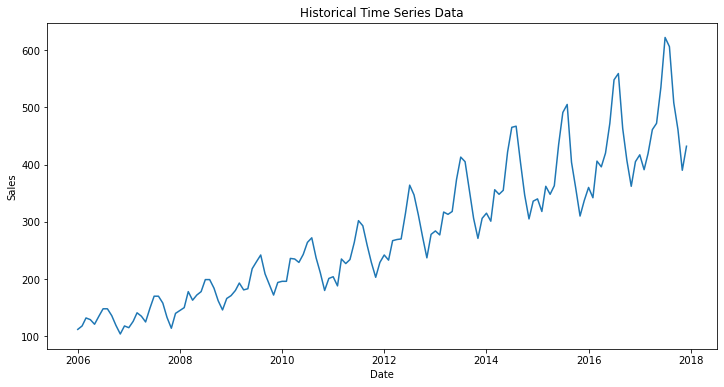

In [206]:
# Visualize the time series data.
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'])
plt.title('Historical Time Series Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [207]:
df.rename(columns = {'Sales':'value'}, inplace = True)

In [208]:
rolmean = df.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df.rolling(window=12).std()
print(rolmean,rolstd)

                 value
Date                  
2006-01-01         NaN
2006-02-01         NaN
2006-03-01         NaN
2006-04-01         NaN
2006-05-01         NaN
...                ...
2017-08-01  463.333333
2017-09-01  467.083333
2017-10-01  471.583333
2017-11-01  473.916667
2017-12-01  476.166667

[144 rows x 1 columns]                 value
Date                 
2006-01-01        NaN
2006-02-01        NaN
2006-03-01        NaN
2006-04-01        NaN
2006-05-01        NaN
...               ...
2017-08-01  83.630500
2017-09-01  84.617276
2017-10-01  82.541954
2017-11-01  79.502382
2017-12-01  77.737125

[144 rows x 1 columns]


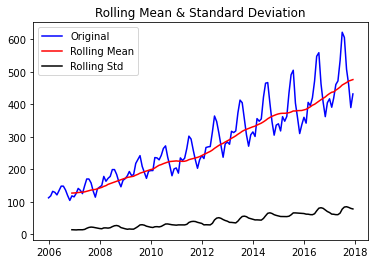

In [209]:
#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [210]:
# from the graph we can say that our time series is not stationary, 
# because rolling statistics ie: mean does not  remain time invariant or constant with time.


hypothesis : time series is not stationary

### ADCF TEST

In [211]:
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

print('Results of Dickey Fuller Test:')
# Check for stationarity using the Augmented Dickey-Fuller (ADF) test.
result = sm.tsa.adfuller(df['value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

Results of Dickey Fuller Test:
ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


For our time series data to be stationary ,ADCF test should have:

- p-value to be low (according to the null hypothesis)
- The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

But here, p-value is very large. Also critical values are not close to the Test Statistics.
Therefore Time Series at the moment is not stationary

In [212]:
#To make my data stationary , possible approaches are :
#Differencing (First Difference)
#Log Transformation
#Seasonal Differencing
#Moving Averages

In [213]:
#df['Sales First Difference'] = df['value'] - df['value'].shift(1)

In [214]:
df

,value
Date,
2006-01-01,112.0
2006-02-01,118.0
2006-03-01,132.0
2006-04-01,129.0
2006-05-01,121.0
...,...
2017-08-01,606.0
2017-09-01,508.0
2017-10-01,461.0


c:\Users\supra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


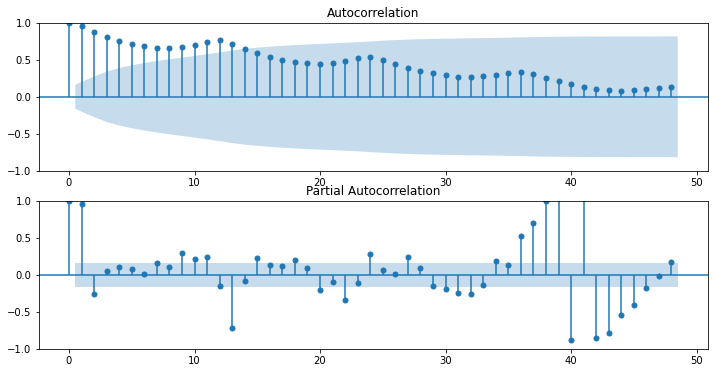

In [215]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set the number of lags you want to display
max_lag = 48  # Change this to the desired number of lags

# Create ACF plot
fig, ax = plt.subplots(2, 1, figsize=(12, 6))  # Adjust the figure size as needed
plot_acf(df['value'], lags=max_lag, ax=ax[0])

# Create PACF plot
plot_pacf(df['value'], lags=max_lag, ax=ax[1])

plt.show()


This graph shows that data is seasonal

In [216]:
df['seasonal_diff']= df['value'].sub(df['value'].shift(12))


In [217]:
df

,value,seasonal_diff
Date,,
2006-01-01,112.0,NaN
2006-02-01,118.0,NaN
2006-03-01,132.0,NaN
2006-04-01,129.0,NaN
2006-05-01,121.0,NaN
...,...,...
2017-08-01,606.0,47.0
2017-09-01,508.0,45.0
2017-10-01,461.0,54.0


In [218]:
df.dropna(inplace=True)


To check for stationarity using ADCF test

In [219]:
print('Results of Dickey Fuller Test:')
# Check for stationarity using the Augmented Dickey-Fuller (ADF) test.
result = sm.tsa.adfuller(df['seasonal_diff'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

Results of Dickey Fuller Test:
ADF Statistic: -3.383020726492481
p-value: 0.011551493085514954
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


p-value > 0.05

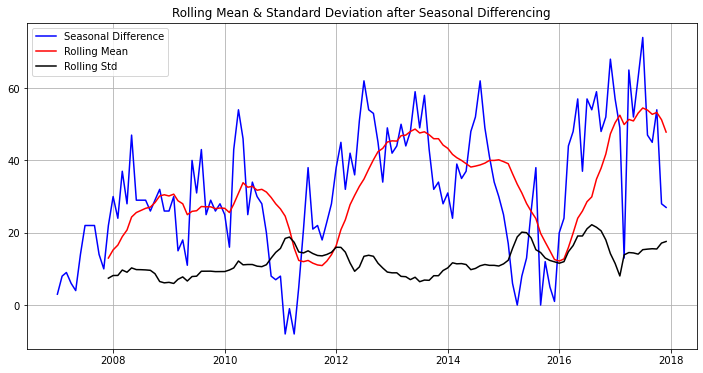

In [220]:
import matplotlib.pyplot as plt

# Calculate rolling statistics for seasonal_diff
rolmean = df['seasonal_diff'].rolling(window=12).mean()
rolstd = df['seasonal_diff'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(df['seasonal_diff'], color='blue', label='Seasonal Difference')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after Seasonal Differencing')
plt.grid(True)
plt.show()


data is not stationary yet

LOG TRANSFORMATION

In [221]:
df['Log_Value'] = np.log(df['value'])


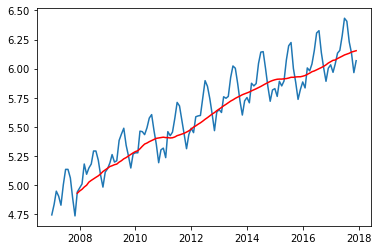

In [222]:
movingAverage = df.Log_Value.rolling(window=12).mean()
movingSTD = df.Log_Value.rolling(window=12).std()
plt.plot(df.Log_Value)
plt.plot(movingAverage, color='red')

In [223]:
LogMinusMA = df.Log_Value - movingAverage
LogMinusMA.head(12)

#Remove NAN values
LogMinusMA.dropna(inplace=True)
LogMinusMA.head(10)

Date
2007-12-01    0.010818
2008-01-01    0.026593
2008-02-01    0.045965
2008-03-01    0.197695
2008-04-01    0.093955
2008-05-01    0.121101
2008-06-01    0.140570
2008-07-01    0.238966
2008-08-01    0.225840
2008-09-01    0.134776
Name: Log_Value, dtype: float64

In [224]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# ADF test function
def test_stationarity(timeseries):
    # Calculate rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey–Fuller test
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)




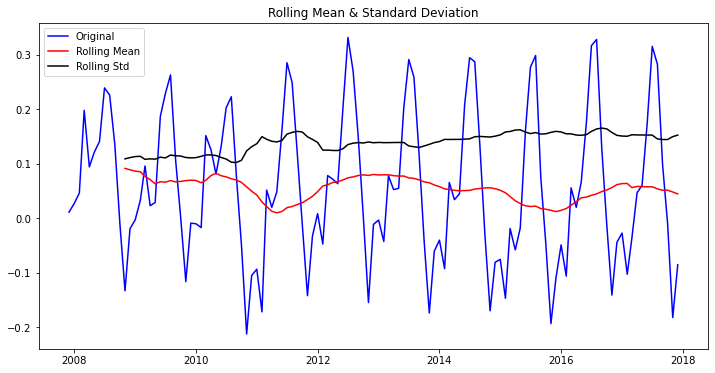

Results of Dickey Fuller Test:
Test Statistic                  -3.103948
p-value                          0.026262
#Lags Used                      13.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [225]:

test_stationarity(LogMinusMA)

### DATA IS STATIONARY

In [226]:
type(LogMinusMA)

pandas.core.series.Series

In [227]:
import pandas as pd

# Assuming 'LogMinusMA' is a Series
LogMinusMA = pd.DataFrame({'date': LogMinusMA.index, 'value': LogMinusMA.values})

LogMinusMA.head()


,date,value
0,2007-12-01,0.010818
1,2008-01-01,0.026593
2,2008-02-01,0.045965
3,2008-03-01,0.197695
4,2008-04-01,0.093955


# ARIMA 

In [228]:
train_size = int(len(LogMinusMA) * 0.8)
train_data = LogMinusMA.iloc[:train_size]
test_data = LogMinusMA.iloc[train_size:]

# Build an ARIMA model (adjust p, d, and q based on your data and diagnostics).
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order

In [229]:
train_data

,date,value
0,2007-12-01,0.010818
1,2008-01-01,0.026593
2,2008-02-01,0.045965
3,2008-03-01,0.197695
4,2008-04-01,0.093955
...,...,...
91,2015-07-01,0.276817
92,2015-08-01,0.298412
93,2015-09-01,0.075268
94,2015-10-01,-0.045657


In [230]:
model = sm.tsa.ARIMA(train_data['value'], order=(p, d, q))
results = model.fit()

In [231]:
forecast_results = results.get_forecast(steps=len(test_data))
forecast_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()
conf_int

,lower value,upper value
96,-0.442290,-0.057759
97,-0.522077,0.098563
98,-0.611744,0.136174
99,-0.660382,0.220218
100,-0.722671,0.258425
101,-0.764565,0.316698
102,-0.813103,0.354095
103,-0.851136,0.399707
104,-0.891748,0.435164
105,-0.926713,0.473634


In [236]:
forecast_values

96    -0.081812
97    -0.075875
98    -0.132833
99     0.002005
100   -0.030889
101   -0.007332
102    0.157709
103    0.263443
104    0.265772
105    0.078065
106   -0.058379
107   -0.202531
108   -0.094104
109   -0.085457
110   -0.143652
111   -0.007523
112   -0.040889
113   -0.017441
114    0.146898
115    0.252456
116    0.254056
117    0.067558
118   -0.069429
119   -0.213426
120   -0.105130
Name: predicted_mean, dtype: float64

In [237]:
stderr = np.std(test_data['value'] - forecast_values)  # Standard error

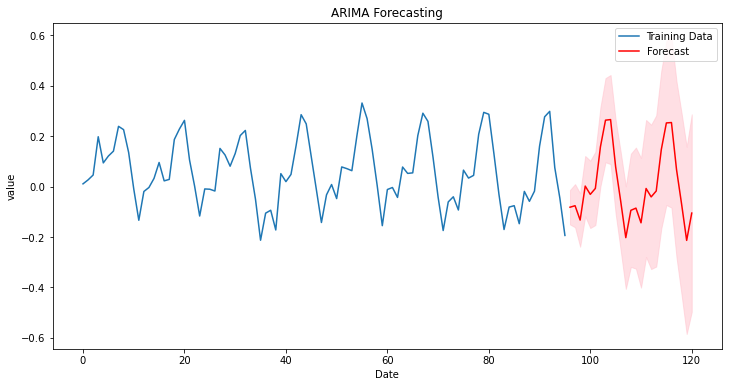

Mean Squared Error (MSE): 0.0024744318582666978
Mean Absolute Error (MAE): 0.04612355473662169
Root Mean Squared Error (RMSE): 0.04974366148834138


In [238]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.figure(figsize=(12, 6))
plt.plot(train_data['value'], label='Training Data')
plt.plot(test_data.index, forecast_values, label='Forecast', color='red')
plt.fill_between(test_data.index, conf_int['lower value'], conf_int['upper value'], color='pink', alpha=0.5)
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('value')
plt.legend()
plt.show()

# Evaluate the model's performance (you can use various metrics)
mse = mean_squared_error(test_data['value'], forecast_values)
print(f'Mean Squared Error (MSE): {mse}')

mae = mean_absolute_error(test_data['value'], forecast_values)
print(f"Mean Absolute Error (MAE): {mae}")

# Root Mean Squared Error (RMSE) is the square root of MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

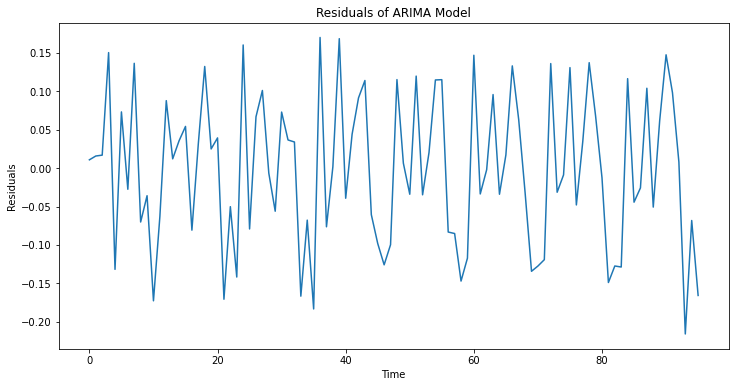

c:\Users\supra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


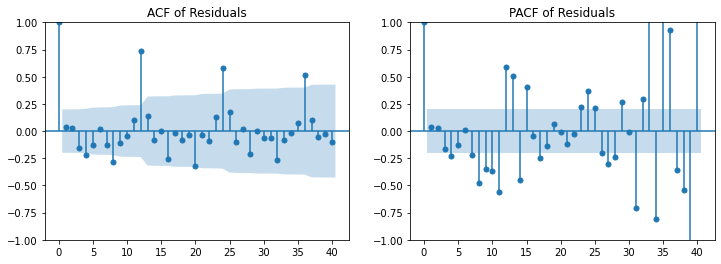

In [240]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

residuals = results.resid

# Plot the time series of residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# ACF and PACF plots of the residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF (Autocorrelation Function) of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax1)
ax1.set_title('ACF of Residuals')

# PACF (Partial Autocorrelation Function) of residuals
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax2)
ax2.set_title('PACF of Residuals')

plt.show()

# SARIMA

c:\Users\supra\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


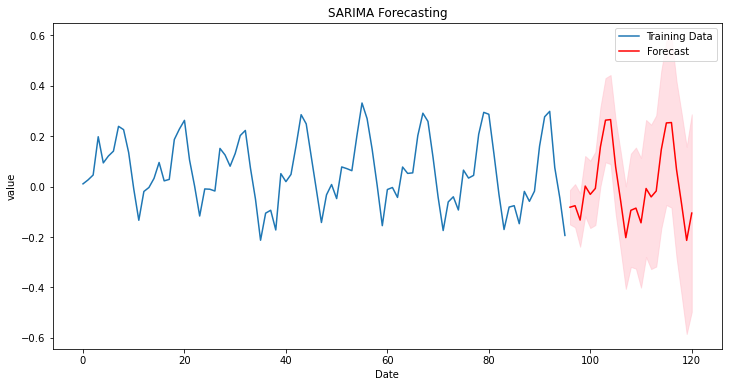

Mean Squared Error (MSE): 0.0024744318582666978
Mean Absolute Error (MAE): 0.04612355473662169
Root Mean Squared Error (RMSE): 0.04974366148834138


In [241]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


# Specify the SARIMA model order and seasonal order
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order
P = 1  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
s = 12  # Seasonal period (e.g., 12 for monthly data)

# Build the SARIMA model
sarima_model = SARIMAX(train_data['value'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

# Generate forecasts for the test set
forecast_results = sarima_results.get_forecast(steps=len(test_data))
forecast_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()
stderr = np.std(test_data['value'] - forecast_values)  # Standard error

# Plot the forecasted values and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train_data['value'], label='Training Data')
plt.plot(test_data.index, forecast_values, label='Forecast', color='red')
plt.fill_between(test_data.index, conf_int['lower value'], conf_int['upper value'], color='pink', alpha=0.5)
plt.title('SARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('value')
plt.legend()
plt.show()

# Evaluate the model's performance using metrics
mse = mean_squared_error(test_data['value'], forecast_values)
print(f'Mean Squared Error (MSE): {mse}')

mae = mean_absolute_error(test_data['value'], forecast_values)
print(f"Mean Absolute Error (MAE): {mae}")

# Root Mean Squared Error (RMSE) is the square root of MSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
